In [53]:
import pandas as pd
import numpy as np

1. Pobierz bazę danych dotyczącą śmiertelnych interwencji policji w USA, a następnie wczytaj ją do obiektu DataFrame.

In [54]:
df = pd.read_csv('fatal-police-shootings-data.csv')
df.rename(columns={'state':'skrót'}, inplace = True)
df.sample(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,skrót,signs_of_mental_illness,threat_level,flee,body_camera
4085,4487,Daniel David Messmer,2019-02-23,shot,gun,24.0,M,W,Victorville,CA,True,attack,Not fleeing,False
2373,2622,Jeremy Austin Lindsey,2017-06-04,shot,gun,27.0,M,W,Callahan,FL,False,attack,NaN,False
1806,2013,Rita King,2016-11-03,shot,gun,56.0,F,NaN,Loganville,GA,False,attack,Not fleeing,False
3395,3737,Brett Luengo,2018-05-24,shot,unarmed,33.0,M,W,Cleveland,OH,True,attack,Not fleeing,False
2565,2848,Jose Ortiz,2017-08-07,shot,knife,29.0,M,H,Wichita,KS,False,other,Not fleeing,False


2. Przekształć tabelę w taki sposób, aby wskazywała zestawienie jednocześnie liczby ofiar interwencji według rasy (‘race’) oraz tego, czy wykazywały one oznaki choroby psychicznej (‘signs_of_mental_illness’).

In [55]:
s_r = df.groupby(['signs_of_mental_illness','race']).count()
s_r['id']


signs_of_mental_illness  race
False                    A         69
                         B       1114
                         H        745
                         N         64
                         O         37
                         W       1763
True                     A         24
                         B        184
                         H        157
                         N         14
                         O         11
                         W        713
Name: id, dtype: int64

3. Za pomocą Map, Applymap lub Apply dodaj do tego zestawienia kolumnę wskazującą jaki odsetek ofiar interwencji wykazywało oznaki choroby psychicznej dla każdej z ras. Odpowiedz, która z nich charakteryzuje się największym odsetkiem znamion choroby psychicznej podczas interwencji. Największym odsetkiem (65%) znamion choroby psychicznej charakteryzuje się rasa "W".

In [56]:
s_r['id'].groupby('signs_of_mental_illness').sum()

signs_of_mental_illness
False    3792
True     1103
Name: id, dtype: int64

In [57]:
tabela = s_r.xs(True)
def odsetek(x):
    o = x/1103
    return o

tabela['odsetek_ofiar'] = tabela['id'].apply(lambda x: odsetek(x)).round(2)
tabela


,id,name,date,manner_of_death,armed,age,gender,city,skrót,threat_level,flee,body_camera,odsetek_ofiar
race,,,,,,,,,,,,,
A,24,24,24,24,24,24,24,24,24,24,24,24,0.02
B,184,184,184,184,180,178,184,184,184,184,181,184,0.17
H,157,157,157,157,155,155,157,157,157,157,150,157,0.14
N,14,14,14,14,14,14,14,14,14,14,14,14,0.01
O,11,11,11,11,11,11,11,11,11,11,11,11,0.01
W,713,713,713,713,700,705,712,713,713,713,694,713,0.65


4. Dodaj kolumnę oznaczającą dzień tygodnia, w którym doszło do interwencji. Zlicz interwencje według odpowiedniego dnia tygodnia. Następnie stwórz wykres kolumnowy, tak aby dni tygodnia były uszeregowane od poniedziałku do niedzieli.

<AxesSubplot: >

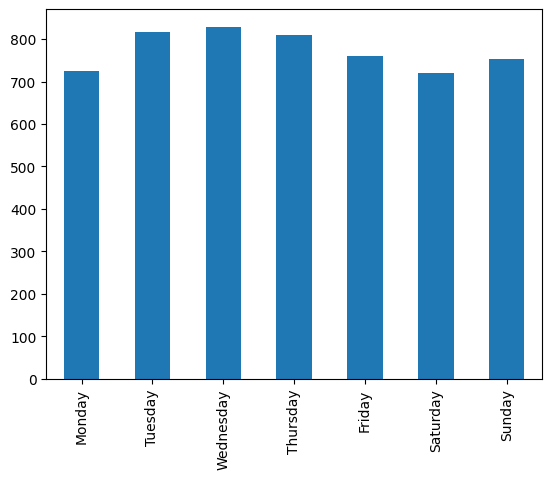

In [58]:
df['date'] = pd.to_datetime(df['date'])
df['date'].dt.day_name()
df['dzień_tygodnia'] = df['date'].dt.day_name()
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ile_dni = df['dzień_tygodnia'].value_counts().reindex(weekdays)
ile_dni.plot(kind="bar")

5. Wczytaj do projektu dane dotyczące populacji w poszczególnych stanach USA oraz dane dotyczące skrótów poszczególnych stanów. Połącz te bazy danych w taki sposób, aby móc policzyć do ilu incydentów w bazie dotyczącej śmiertelnych interwencji doszło w przeliczeniu na 1000 mieszkańców każdego ze stanów.

Tabela dorycząca populacji:

In [64]:
data = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population', header=0)
populacja = data[0]
populacja.drop(['Rank in states & territories, 2019','Rank in states & territories, 2010', 'Percent change, 2010–2019 [note 1]','Census population, April 1, 2010 [3]','Absolute change, 2010-2019', 'Total seats in the U.S. House of Representatives, 2013–2023', 'Estimated population per electoral vote, 2019 [note 2]', 'Estimated population per House seat, 2019', 'Census population per House seat, 2010','Percent of the total U.S. population, 2018 [note 3]'], axis=1, inplace=True)
populacja.rename(columns = {'State':'state'},inplace = True)
populacja.head()

,state,"Population estimate, July 1, 2019 [2]"
0,California,39512223
1,Texas,28995881
2,New York,21477737
3,Florida,19453561
4,Illinois,12801989


Tabela dotycząca nazw Stanów i ich skrótów:

In [60]:
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations',header = 2)
coto = data[0]
coto = coto.iloc[9:60]
coto.reset_index(inplace=True)
coto.drop(['index','ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2)', 'Unnamed: 2','Unnamed: 4', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 6','Unnamed: 5'], axis=1, inplace=True)
coto.rename(columns = {'ISO':'state', 'Unnamed: 3':'skrót'},inplace = True)
coto.head()



C:\Users\kulin\AppData\Local\Temp\ipykernel_372\2510186784.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coto.drop(['index','ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2)', 'Unnamed: 2','Unnamed: 4', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 6','Unnamed: 5'], axis=1, inplace=True)
C:\Users\kulin\AppData\Local\Temp\ipykernel_372\2510186784.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coto.rename(columns = {'ISO':'state', 'Unnamed: 3':'skrót'},inplace = True)


,state,skrót
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


Tabelę o przestępczości łączę z tabelą z nazwali Stanów i ich skrótami, dzięki czemu jestem w stanie stworzyć tabelę z pełną nazwą Stanów wraz z sumowaną liczbą incydentów przypadającą na Stan.

In [61]:
df2 = df.set_index('skrót').join(coto.set_index('skrót'))
df2.head()
liczba_morderstw_na_stan = (df2.groupby('state').count())
liczba_morderstw_na_stan.rename(columns = {'id':'liczba_incydentów'}, inplace=True)
liczba_morderstw_na_stan = liczba_morderstw_na_stan.reset_index()
liczba_morderstw_na_stan = liczba_morderstw_na_stan[['state','liczba_incydentów']]
liczba_morderstw_na_stan.head()

,state,liczba_incydentów
0,Alabama,104
1,Alaska,39
2,Arizona,254
3,Arkansas,83
4,California,799


Następnie łączę tabelę z liczbą incydentów na Stan z tabelą populacji Stanów.

In [62]:
liczba_incydentów = liczba_morderstw_na_stan.set_index('state').join(populacja.set_index('state'))
liczba_incydentów.reset_index(inplace = True)
liczba_incydentów.head()


,state,liczba_incydentów,"Population estimate, July 1, 2019 [2]"
0,Alabama,104,4903185
1,Alaska,39,731545
2,Arizona,254,7278717
3,Arkansas,83,3017825
4,California,799,39512223


Tworzę kolumnę z liczbą incydentów na 1000 mieszkańców.

In [66]:
liczba_incydentów['liczba_incydentów_na_1000_mieszkańców'] = (liczba_incydentów['liczba_incydentów']*1000/liczba_incydentów['Population estimate, July 1, 2019 [2]']).round(2)
liczba_incydentów.head()

,state,liczba_incydentów,"Population estimate, July 1, 2019 [2]",liczba_incydentów_na_1000_mieszkańców
0,Alabama,104,4903185,0.02
1,Alaska,39,731545,0.05
2,Arizona,254,7278717,0.03
3,Arkansas,83,3017825,0.03
4,California,799,39512223,0.02
